In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Statisctics Data Information


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


PREPROCESSING THE LOAN SANCTION DATA


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


In [ ]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


EXPLORATORY DATA ANALYSIS


1) categorical column "Gender".


<Axes: xlabel='count', ylabel='Gender'>

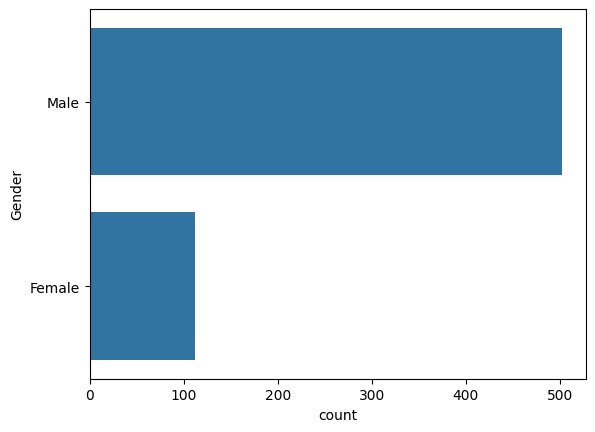

In [ ]:
sns.countplot(df['Gender'])

majority of the applicant is male and a handful is female


2) column "Married"


<Axes: xlabel='count', ylabel='Married'>

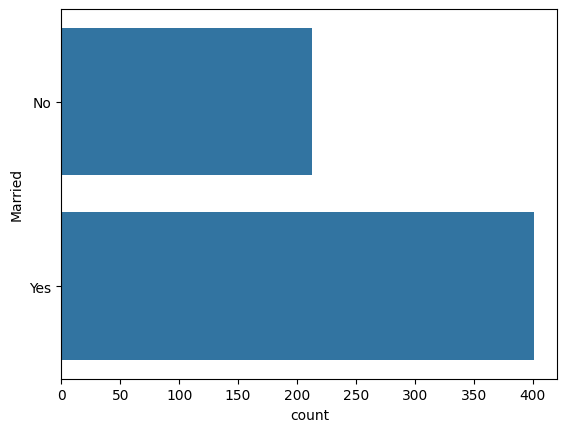

In [ ]:
sns.countplot(df['Married'])

The majority of the applicants are married.

3) column "Dependents".

<Axes: xlabel='count', ylabel='Dependents'>

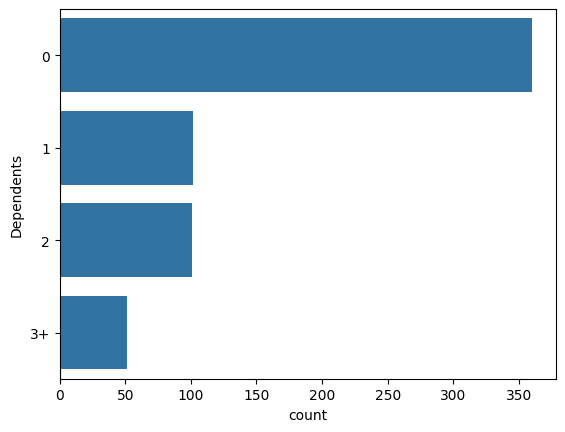

In [ ]:
sns.countplot(df['Dependents'])

The majority of the applicants have zero dependents, around 100 applicants have one or two dependents and only a few have more than three dependents.



4) column "Education".

<Axes: xlabel='count', ylabel='Education'>

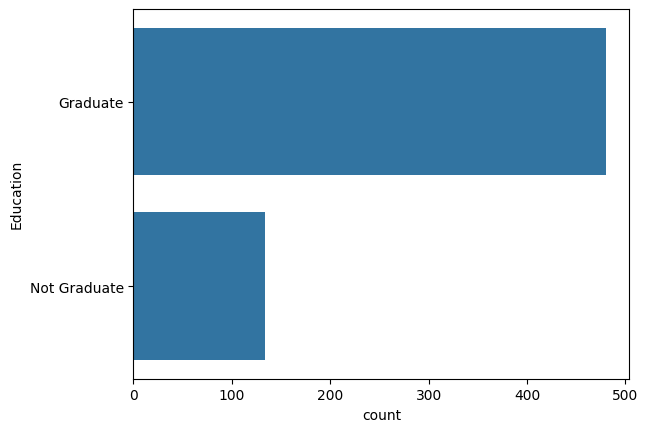

In [ ]:
sns.countplot(df['Education'])

The majority of the applicants are graduated

5) column "Self Employed".

<Axes: xlabel='count', ylabel='Self_Employed'>

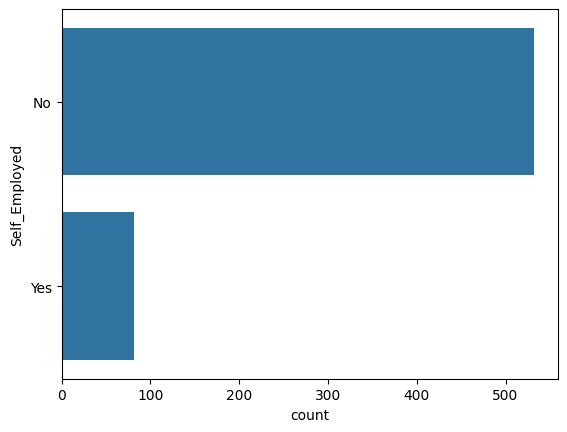

In [ ]:
sns.countplot(df['Self_Employed'])

Around 90 applicants are either freelancers or run a business.



6) column "Property Area".

<Axes: xlabel='count', ylabel='Property_Area'>

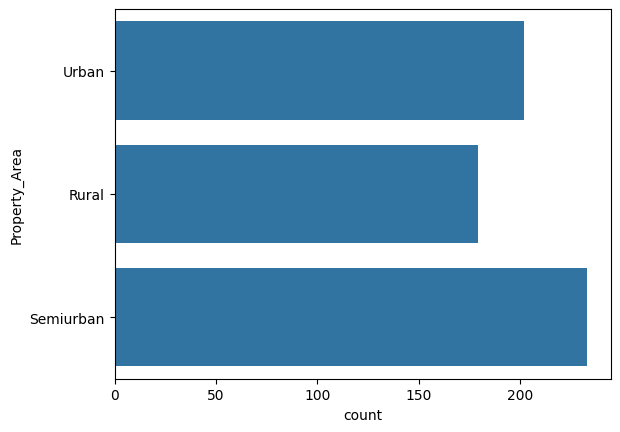

In [ ]:
sns.countplot(df['Property_Area'])

We can assume that the applicants are equally distributed in urban, rural and semi-urban areas.

7)  column "Loan Status".

<Axes: xlabel='count', ylabel='Loan_Status'>

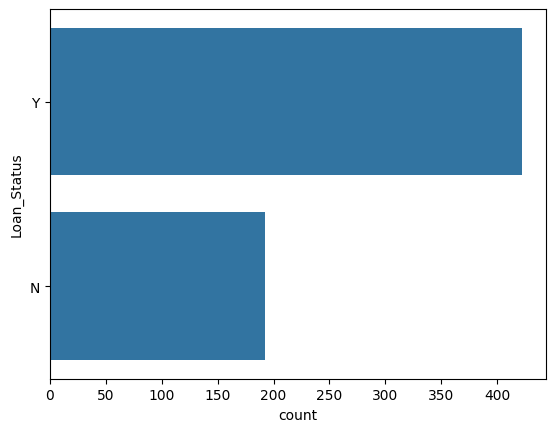

In [ ]:
sns.countplot(df['Loan_Status'])

Around 400 loans are accepted and 200 loans are rejected. Its shows the 2:1 ratio.

8) column "Applicant Income".

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

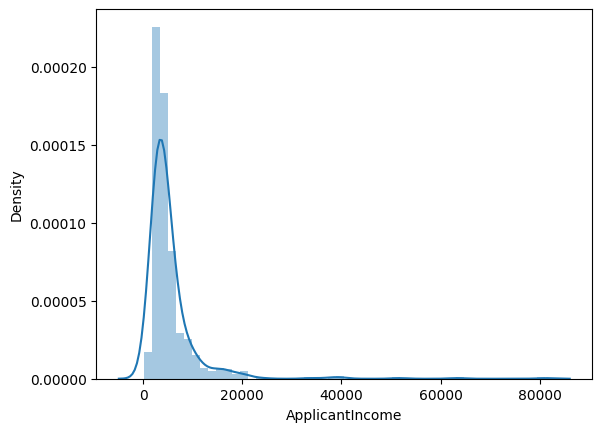

In [ ]:
sns.distplot(df["ApplicantIncome"])

The data are skewed left in the graph, which is not a suitable distribution to train a Model.

Hence, we will apply the Log Transformation later to normalize the attributes in the form of Bell Curve (Normal Distribution).

9) column "Loan Amount".

<Axes: xlabel='LoanAmount', ylabel='Density'>

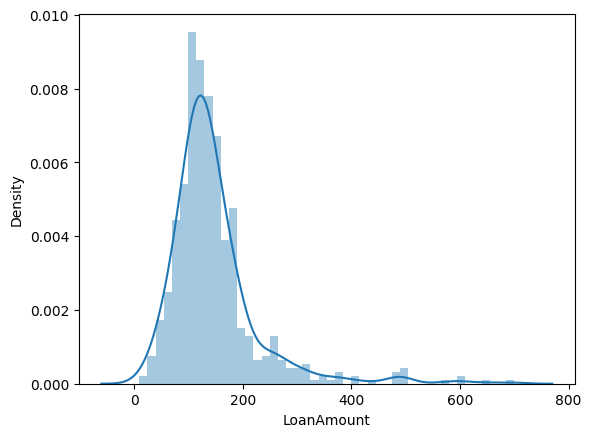

In [ ]:
sns.distplot(df["LoanAmount"])

The data are skewed left in the graph, which is not a suitable distribution to train a Model.

Hence, we will apply the Log Transformation later to normalize the attributes in the form of Bell Curve (Normal Distribution).



10) column "Co-applicant Income".

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

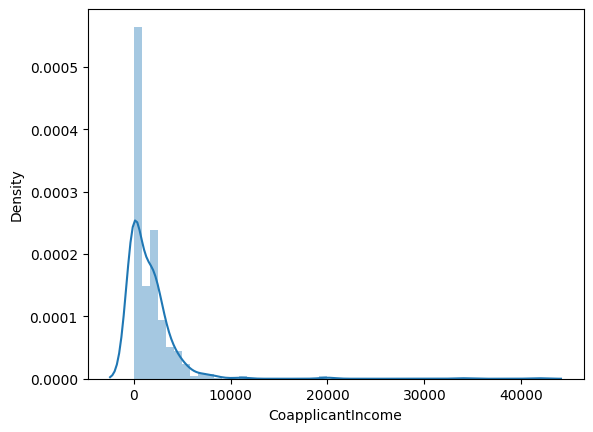

In [ ]:
sns.distplot(df["CoapplicantIncome"])

we have to normalize this graph as well


11) column "Loan Amount Term".

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

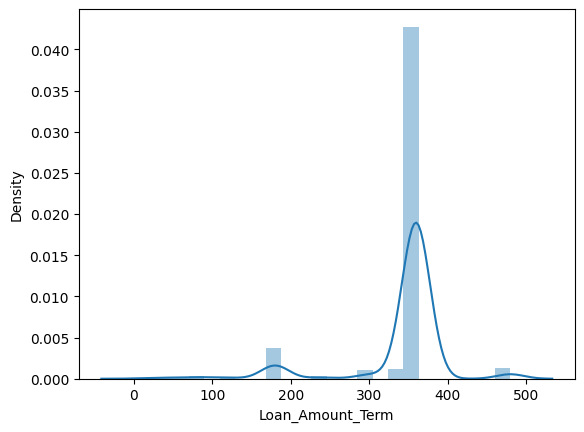

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

The majority of them are filled will main values, that is the highest values. We will apply log transformation of this as well.

12) column "Credit History".

<Axes: xlabel='Credit_History', ylabel='Density'>

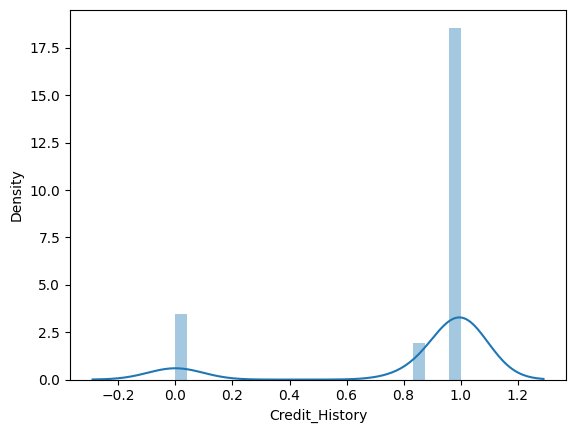

In [ ]:
sns.distplot(df['Credit_History'])

Since the values of credit history are in the range of 0 to 1, we don't need to normalize this graph.

Creation Of New Attributes

We can create a new attribute performing Log Transformation. We can also create a new attribute Total Income, that is the sum of Applicant Income and Co-applicant Income.

In [ ]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


LOG TRANSFORMATION

Log transformation helps to make the highly skewed distribution to less skewed. Instead of changing the column, we will add the data into a new column by writing 'Log' after each column.



1) To the  column "Applicant Income Log".

<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

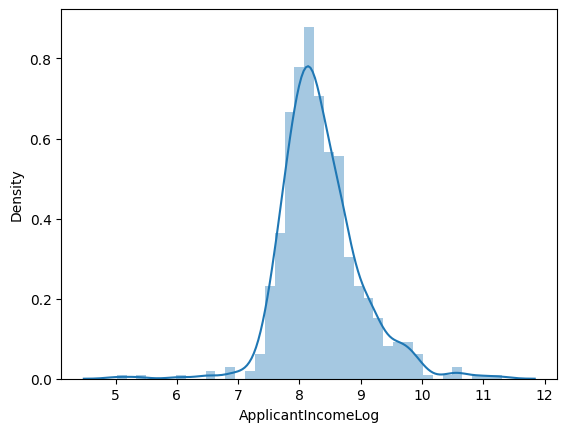

In [ ]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df["ApplicantIncomeLog"])

We can observe a Normal distribution in a form of a Bell Curve.

2) To the column "Co-applicant Income Log".

<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

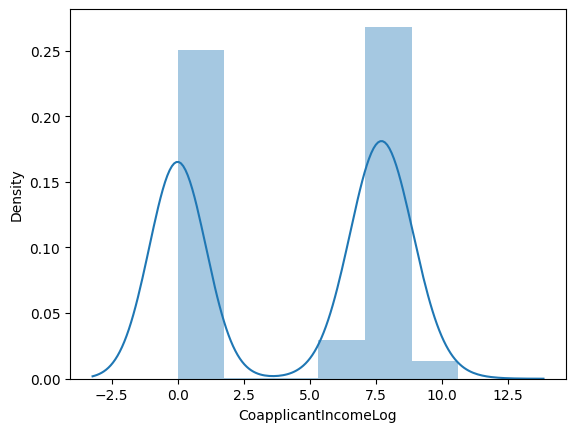

In [ ]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df["CoapplicantIncomeLog"])

3) To the column "Loan Amount Log".

<Axes: xlabel='LoanAmountLog', ylabel='Density'>

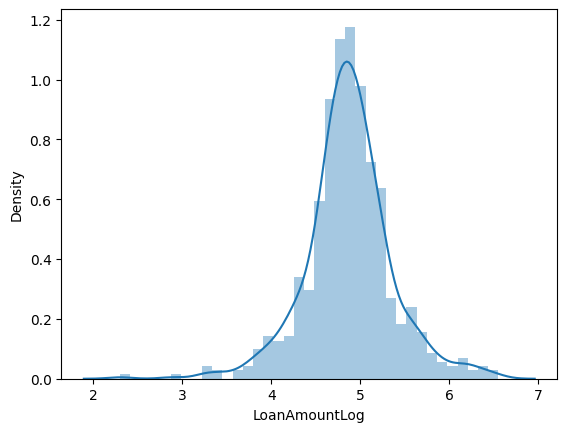

In [ ]:
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmountLog"])

4) To the column "Loan Amount Term Log".

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

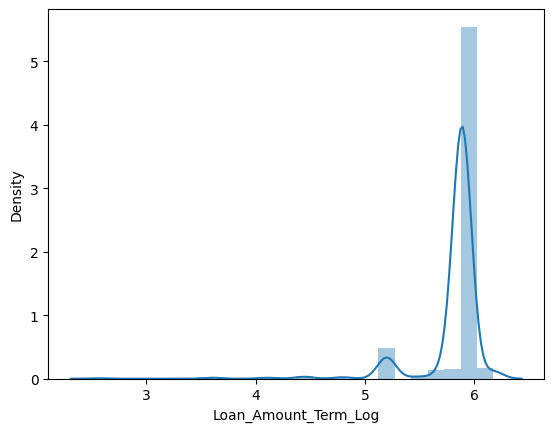

In [ ]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"])

The Loan amount term is slightly better than before. Despite the fact that it is skewed right.

5)To the column "Total Income Log".

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

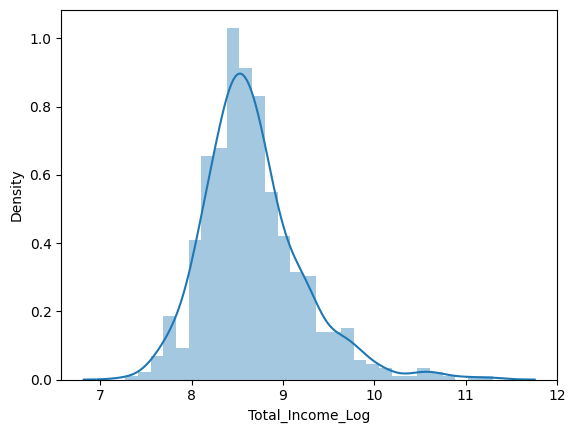

In [ ]:
df['Total_Income_Log'] = np.log(df['Total_Income']+1)

sns.distplot(df["Total_Income_Log"])

We can observe the normal distribution of the newly created column 'Total Income'.


CORRELATION MATRIX

<Axes: >

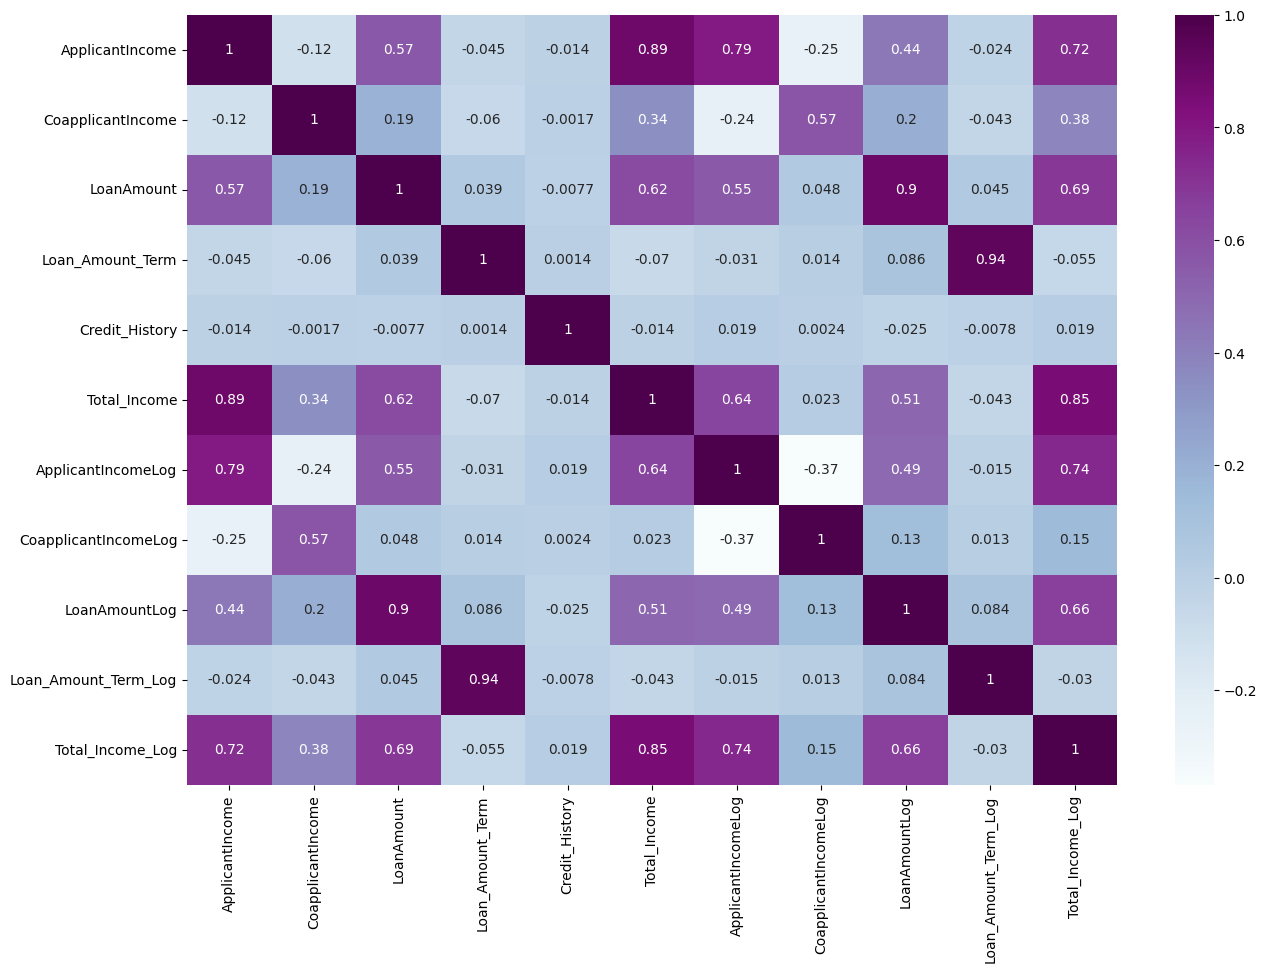

In [ ]:
dfh = df[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'ApplicantIncomeLog', 'CoapplicantIncomeLog', 'LoanAmountLog', 'Loan_Amount_Term_Log', 'Total_Income_Log']]
corr = dfh.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")


In this graph, the higher density is plotted with dark color and the lower density is plotted with light color.

We need to remove the highly correlated attributes.

It means the original attributes are correlated with log attributes.

We will remove the previous attributes and keep the log attributes to train our model.

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


lets remove the unnessary columns

In [ ]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


LABEL ENCODING

We will use label encoding to convert the categorical column into the numerical column.

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', "Married", "Education", 'Self_Employed', "Property_Area", "Loan_Status", "Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


All the values of the dataset are now in numerical format. It will help us to train our model easily.

For Loan status 1 indicates 'Yes' and 0 indicates 'No'.

SPLITTING THE DATA FOR TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming 'df' is your DataFrame

# Separate features (X) and target (y)
X = df.drop('Loan_Status', axis=1)  # Features: all columns except 'Loan_Status'
y = df['Loan_Status']  # Target: 'Loan_Status' column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib # Import the joblib module

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl') # Now you can use joblib.dump()

['scaler.pkl']

In [ ]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 4. K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 5. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predictions
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

In [ ]:
prediction_df = pd.DataFrame({
    # 'Loan_ID': df['Loan_ID'],  # Remove or comment out this line as 'Loan_ID' is no longer in the DataFrame
    'Random_Forest_Prediction': rf_pred,
    'Decision_Tree_Prediction': dt_pred,
    'KNN_Prediction': knn_pred,
    'Logistic_Regression_Prediction': lr_pred
})
# If you want Loan_ID, you need to preserve it before dropping:
# loan_ids = df['Loan_ID']  # Store Loan_ID before dropping
# ... (your code to drop columns) ...
# prediction_df['Loan_ID'] = loan_ids  # Add Loan_ID back to prediction_df

In [ ]:
print(prediction_df)

     Random_Forest_Prediction  Decision_Tree_Prediction  KNN_Prediction  \
0                           1                         1               1   
1                           1                         0               1   
2                           1                         1               1   
3                           1                         0               1   
4                           1                         1               1   
..                        ...                       ...             ...   
118                         1                         0               1   
119                         1                         0               1   
120                         1                         1               1   
121                         1                         1               0   
122                         1                         1               0   

     Logistic_Regression_Prediction  
0                                 1  
1                      

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an empty dictionary to store the results
results = {}

# Loop through each model and calculate the metrics
for model_name, model, y_pred in [
    ('Random Forest', rf_model, rf_pred),
    ('Decision Tree', dt_model, dt_pred),

    ('KNN', knn_model, knn_pred),
    ('Logistic Regression', lr_model, lr_pred)
]:
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Convert the results dictionary to a pandas DataFrame for better display
results_df = pd.DataFrame.from_dict(results, orient='index')

# Display the table
display(results_df)

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.788618,0.770000,0.9625,0.855556
Decision Tree,0.674797,0.743902,0.7625,0.753086
KNN,0.731707,0.737374,0.9125,0.815642
Logistic Regression,0.788618,0.759615,0.9875,0.858696


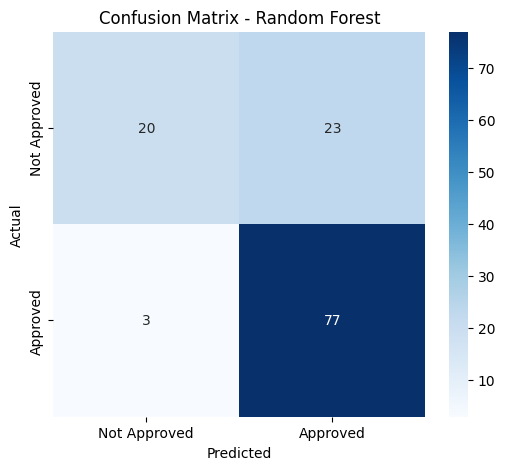

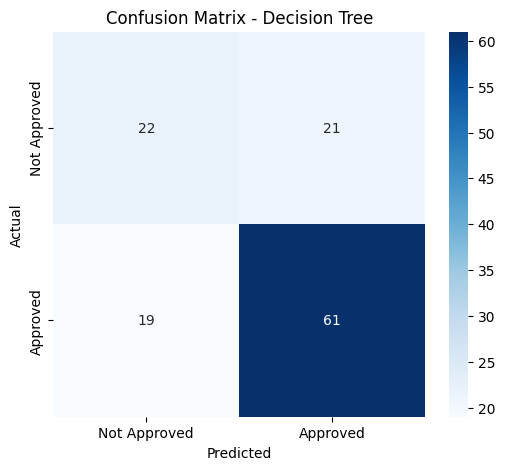

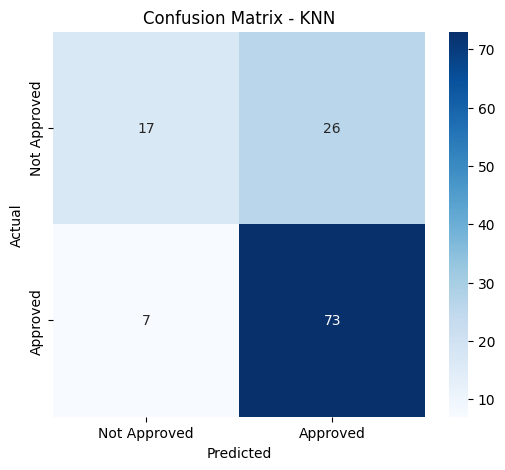

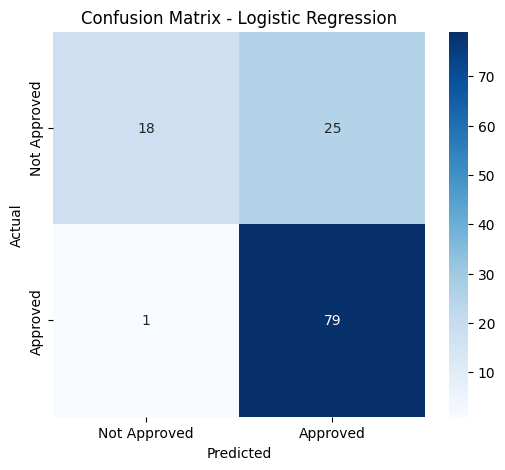

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred) # Changed X_test to y_test
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Now, plot confusion matrices for each model

# Plot for Random Forest
plot_confusion_matrix(y_test, rf_pred, 'Random Forest') # Changed X_test to y_test

# Plot for Decision Tree
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree') # Changed X_test to y_test


# Plot for KNN
plot_confusion_matrix(y_test, knn_pred, 'KNN') # Changed X_test to y_test

# Plot for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, 'Logistic Regression') # Changed X_test to y_test

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define scoring functions
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Define models
models = {
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'KNN': knn_model,
    'Logistic Regression': lr_model
}

# Perform cross-validation and store results
results = {}
for model_name, model in models.items():
    for metric_name, scorer in scoring.items():
        cv_scores = cross_val_score(model, X, y, cv=3, scoring=scorer)  # 3-fold cross-validation
        results.setdefault(model_name, {})[metric_name] = cv_scores.mean()

# Convert results to DataFrame and display
results_df = pd.DataFrame.from_dict(results, orient='index')
display(results_df)

,accuracy,precision,recall,f1_score
Random Forest,0.783421,0.793780,0.926511,0.854791
Decision Tree,0.714945,0.808475,0.767663,0.786933
KNN,0.736147,0.753928,0.914657,0.826521
Logistic Regression,0.811119,0.792398,0.983418,0.877539


In [ ]:
import joblib

joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')

joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']

In [ ]:
!pip install gradio --upgrade #upgrade gradio to the latest version
import gradio as gr
import joblib
import numpy as np

# Load the saved models and scaler
lr_model = joblib.load('lr_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define the prediction function
def predict_loan_status(Gender, Married, Dependents, Education, Self_Employed, ApplicantIncomeLog, LoanAmountLog, Loan_Amount_Term_Log, Credit_History, Property_Area, Total_Income_Log):
    input_data = [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncomeLog, LoanAmountLog, Loan_Amount_Term_Log, Credit_History, Property_Area, Total_Income_Log]
    input_data = np.array(input_data).reshape(1, -1)
    input_data = scaler.transform(input_data)
    prediction = lr_model.predict(input_data)[0]
    return "Approved" if prediction == 1 else "Rejected"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_loan_status,
    inputs=[
        gr.Radio(choices=[0, 1], label="Gender (0: Female, 1: Male)"), #gr.inputs.Radio should be gr.Radio
        gr.Radio(choices=[0, 1], label="Married (0: No, 1: Yes)"),#gr.inputs.Radio should be gr.Radio
        gr.Radio(choices=[0, 1, 2, 3], label="Dependents (0: 0, 1: 1, 2: 2, 3: 3+)"),#gr.inputs.Radio should be gr.Radio
        gr.Radio(choices=[0, 1], label="Education (0: Not Graduate, 1: Graduate)"),#gr.inputs.Radio should be gr.Radio
        gr.Radio(choices=[0, 1], label="Self_Employed (0: No, 1: Yes)"),#gr.inputs.Radio should be gr.Radio
        gr.Number(label="Applicant Income"),#gr.inputs.Number should be gr.Number
        gr.Number(label="Loan Amount"),#gr.inputs.Number should be gr.Number
        gr.Number(label="Loan Amount Term"),#gr.inputs.Number should be gr.Number
        gr.Number(label="Credit History"),#gr.inputs.Number should be gr.Number
        gr.Radio(choices=[0, 1, 2], label="Property Area (0: Rural, 1: Semiurban, 2: Urban)"),#gr.inputs.Radio should be gr.Radio
        gr.Number(label="Total Income")#gr.inputs.Number should be gr.Number
    ],
    outputs="text",
    title="Loan Prediction App"
)

# Launch the interface
iface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://685f82029efe921f22.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/s